## Usando a biblioteca `html2text`

In [15]:
from html2text import html2text

print(html2text("<p>Hello, world.</p>"))

Hello, world.




# Teste: exemplo Syngenta
## Abrindo o site principal e coletando os links de cada semente:

In [77]:
from urllib.request import urlopen
from urllib.parse import urljoin
from bs4 import BeautifulSoup

In [78]:
def scrap_colect_links(url, class_card):
    
    """Abre o link principal da Syngenta e busca os links de cada semente"""
    
    html = urlopen(url)
    scrap = BeautifulSoup(html, 'html.parser')

    cards = scrap.find_all('div', {'class': class_card})
    
    links = []

    for link in cards:
        link = link.a['href']
        links.append(urljoin('https://www.portalsyngenta.com.br', link))
    
    return links                   

In [81]:
links = scrap_colect_links(url, 'card-text-2 card-portfolio') 
links

['https://www.portalsyngenta.com.br/sementes/nk-soja/nk-8770-ipro',
 'https://www.portalsyngenta.com.br/sementes/nk-soja/nk-7777-ipro',
 'https://www.portalsyngenta.com.br/sementes/nk-soja/nk-8448-ipro',
 'https://www.portalsyngenta.com.br/sementes/nk-soja/nk-8301-ipro',
 'https://www.portalsyngenta.com.br/sementes/nk-soja/nk-7201-ipro',
 'https://www.portalsyngenta.com.br/sementes/nk-soja/nk-6201-ipro']

## Usando `html2text` de todas as páginas;
### Armazenando os textos em um dict ( )

In [193]:
paginas_sementes_nk = {}

for link in links: 
     
    html = urlopen(link)
    scrap = BeautifulSoup(html, 'html.parser')
    pagina = html2text(scrap.prettify()).lower()   # trazendo tudo para minusculo
        
    paginas_sementes_nk[link[-12:]]= pagina
    
print(len(paginas_sementes_nk))

6


## Explorando o texto com `find`

In [108]:
i = paginas_sementes_nk['nk-8770-ipro'].find('cor da flor')
if i:
    print(i+len('cor da flor'))


19878

## Análise de texto exploratória:

Referência https://towardsdatascience.com/exploratory-text-analysis-in-python-8cf42b758d9e
* `nltk` : The Natural Language Toolkit library

In [109]:
import nltk        # The Natural Language Toolkit library
nltk.download('punkt')        # for sent_tokenize
nltk.download('stopwords') 
nltk.download('wordnet')      # for WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /home/anandaheino/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anandaheino/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anandaheino/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [110]:
# Data manipulation/analysis
import numpy as np
import pandas as pd

In [111]:
# Data partitioning
from sklearn.model_selection import train_test_split

In [112]:
# Text preprocessing/analysis
import re
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [113]:
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context='talk', 
        palette=['#D44D5C', '#43AA8B'])

## Transformando tudo em strings separadas:



In [180]:
test_string = paginas_sementes_nk['nk-8770-ipro'].split()
len(test_string)
print(test_string[:20])

['skip', 'to', 'main', 'content', 'pesquisa', '__', '![pesquisa](https://mediasyg.pixit.com.br/s3fs-public/search-icon-2.svg)', '[', '![facebook](https://mediasyg.pixit.com.br/s3fs-public/facebook-header.png)', '](https://www.facebook.com/syngenta/)', '[', '![instagram](https://mediasyg.pixit.com.br/s3fs-public/instagram-header.png)', '](https://www.instagram.com/syngentabrasil/)', '[', '![linkedin](https://mediasyg.pixit.com.br/s3fs-public/linkedin-header.png)', '](https://www.linkedin.com/company/syngenta/)', '[', '![youtube](https://mediasyg.pixit.com.br/s3fs-public/youtube-header.png)', '](https://www.youtube.com/user/syngentabrasil)', '[']


* vemos acima que muitos tokens começam com **! e (, ), [, ]**... Isso pode ser removido

## Mostrando as 20 strings mais comuns:

In [126]:
frequentes20 = FreqDist(test_string).most_common(20)
frequentes20

[('[', 258),
 ('*', 242),
 ('|', 109),
 ('de', 91),
 ('e', 74),
 ('para', 30),
 ('a', 27),
 ('da', 25),
 ('no', 21),
 ('syngenta', 19),
 ('sementes', 18),
 ('o', 18),
 ('um', 17),
 ('voltar', 14),
 ('é', 14),
 ('®', 13),
 ('do', 13),
 ('em', 13),
 ('culturas', 12),
 ('das', 12)]

## Olhando as Strings curtas: com < = 3 caracteres

* importantes: "cor", "da", "kg", "pms"
* talvez seja uma abordagem melhor remover as mais rapetidas

In [132]:
curtas3 = set(c for c in test_string if len(c)<4)

for c in curtas3:
    print(c, ' | ', end='')

em  | kg  | pms  | nos  | uma  | fs,  | cor  | com  | ma  | boa  | que  | sc  | bem  | 10  | ®  | as  | 125  | .  | tem  | 600  | new  | |  | ©  | cm)  | 2  | das  | um  | ##  | 14  | 704  | uso  | nas  | sem  | *  | nk  | no  | duo  | seu  | 110  | não  | 115  | dfc  | +  | /  | de  | s,  | 260  | >  | 250  | pro  | \-  | mm  | [  | 1  | por  | (nº  | 405  | –  | na  | 8.7  | s  | dos  | to  | uv  | ao  | do  | 97  | ](/  | os  | 404  | 320  | r&d  | 3  | 50  | é  | tsi  | top  | pi  | e  | 190  | o  | 200  | 19  | faz  | 5,5  | -  | 112  | a  | mas  | __  | 140  | :  | da  | 

In [ ]:
def summarise(pattern, strings, freq):
    """Summarise strings matching a pattern."""
    # Find matches
    compiled_pattern = re.compile(pattern)
    matches = [s for s in strings if compiled_pattern.search(s)]
    
    # Print volume and proportion of matches
    print("{} strings, that is {:.2%} of total".format(len(matches), 
                                                       len(matches)/ 
                                                       len(strings)))
    
    # Create list of tuples containing matches and their frequency
    output = [(c, freq[c][0]) for c in set(matches)]
    output.sort(key=lambda x:x[1], reverse=True)
    
    return output
# Find strings possibly containing html tag
summarise(r"[!, \s]", test_string, frequentes20)

## Tokenising
💡 Token is a sequence of characters = words.

💡 Tokenisation is a process of splitting a document into tokens and sometimes also throwing away certain characters such as punctuation. 
* Example: Tokenisation turns ‘This movie was awesome’ into 4 tokens: [‘This’, ‘movie’, ‘was’, ‘awesome’]

In [170]:
test_string = list(test_string.copy())
tokeniser = RegexpTokenizer(r"[a-zA-Z0-9]+")
tokens = tokeniser.tokenize(paginas_sementes_nk['nk-8770-ipro'])

print(f'Testando a primeira página de sementes: Nº tokens\n* total: 
      {len(tokens)}\n* únicos: {len(set(tokens))}')     

Testando a primeira página de sementes: Nº tokens
* total: 3518
* únicos: 744


## Nº de caracteres médio / token contido na primeira pagina:


Nº médio de caracteres/token: 4.9795


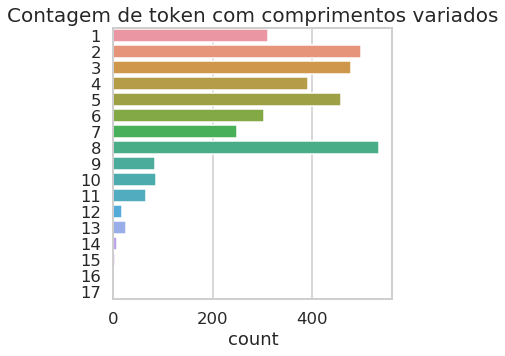

In [175]:
# Create list of token lengths for each token
token_length = [len(t) for t in tokens]

# Average number of characters per token
print(f"Nº médio de caracteres/token: {round(np.mean(token_length),4)}")

# Plot distribution
plt.figure(figsize=(5, 5))
sns.countplot(y=token_length)
plt.title("Contagem de token com comprimentos variados", size=20);

## Verificando as stopwords do idioma do texto:
### Adicionando mais stopwords personalizadas com `extend`

In [212]:
stop_words = stopwords.words("portuguese")
stop_words.extend(['skip', 'to', 'main', 'content', 'pesquisa', 
                   '[', '*', '|', 'voltar', '®', 'https','websites',
                   'whatsapp', 'www','turkey','uk','ukraine','us',
                   'xtra','youtube','zealand', 'ajudar', 'united',
                   'australia','austria','avan','avicta','aviso',
                   'bangladesh','banner','belarus','belgium','bem',
                   'bg','br','brasil','brazil','bulgaria','by','c',
                   'ca','caf','canada','canais','canal1','canal2',
                   'colombia','country','croatia','czech','denmark',
                   'facebook', 'faleconosco','finland','france',
                   'germany','greece','guatemala','hortifr','hortifruti',
                   'https','hungary','india','instagram','ireland','italy',
                   'kazakhstan','kenya','kingdom','korea','linkedin',
                   'mailto','mexico','netherlands','norway','pakistan',
                   'panama','phone','podcast','podcasts','poland','portugal',
                   'pt','quer','republic','romania','russia','sc','sk',
                   'slovakia','slovenia','south','spain','states','sweden',
                   'switzerland','th','thailand', 'tsi','uruguay','user',
                   'venezuela','vietnam','mediasyg', 'pixit', 's3fs', 'public', 
                   'search', 'icon','svg','png','header','api', 'send', 
                   '5511957869038', 'text', 'app', 'absent', '0','argentina',
                   'chile','china','indonesia','japan','lithuania','africa',
                   '2', 'syngenta', 'syngentabrasil','home', 'sites', 'default', 
                   'files', 'logo','historia','hist'])
 
 
print(f"Em português, temos {len(stop_words)} stopwords.\n São elas:\n")
for w in stop_words:
    print(w, ' | ', end='')

Em português, temos 340 stopwords.
 São elas:

de  | a  | o  | que  | e  | é  | do  | da  | em  | um  | para  | com  | não  | uma  | os  | no  | se  | na  | por  | mais  | as  | dos  | como  | mas  | ao  | ele  | das  | à  | seu  | sua  | ou  | quando  | muito  | nos  | já  | eu  | também  | só  | pelo  | pela  | até  | isso  | ela  | entre  | depois  | sem  | mesmo  | aos  | seus  | quem  | nas  | me  | esse  | eles  | você  | essa  | num  | nem  | suas  | meu  | às  | minha  | numa  | pelos  | elas  | qual  | nós  | lhe  | deles  | essas  | esses  | pelas  | este  | dele  | tu  | te  | vocês  | vos  | lhes  | meus  | minhas  | teu  | tua  | teus  | tuas  | nosso  | nossa  | nossos  | nossas  | dela  | delas  | esta  | estes  | estas  | aquele  | aquela  | aqueles  | aquelas  | isto  | aquilo  | estou  | está  | estamos  | estão  | estive  | esteve  | estivemos  | estiveram  | estava  | estávamos  | estavam  | estivera  | estivéramos  | esteja  | estejamos  | estejam  | estivesse  | e

## Removendo as stopwords da página

In [213]:
tokens_clean = [t for t in tokens if t not in stop_words]
print(f"Nº de tokens após limpeza: {len(tokens_clean)}")
print(f'Foi removido {100-(len(tokens_clean)*100/len(tokens)):.2f}% dos tokens')

Nº de tokens após limpeza: 1794
Foi removido 49.01% dos tokens


In [220]:
print(tokens_clean[800:900])

['amplo', 'espectro', 'controle', 'plantas', 'daninhas', 'flexibilidade', 'uso', 'moddus', 'cana', 'produtos', 'moddus', 'cana', 'moddus', 'cana', 'moddus', 'regulador', 'crescimento', 'seletivo', 'recomendado', 'aplica', 'cultura', 'cana', 'car', 'visando', 'acelera', 'processos', 'matura', 'planta', 'ac', 'mulo', 'sacarose', 'colmo', 'moddus', 'trigo', 'produtos', 'moddus', 'trigo', 'moddus', 'trigo', 'moddus', 'regulador', 'crescimento', 'seletivo', 'recomendado', 'aplica', 'cultura', 'trigo', 'cevada', 'visando', 'reduzir', 'crescimento', 'plantas', 'fortalecimento', 'n', 's', 'basais', 'reglone', 'produtos', 'reglone', 'reglone', 'reglone', 'melhor', 'op', 'desseca', 'pr', 'plantio', 'sequencial', 'ideal', 'controle', 'plantas', 'daninhas', 'resistentes', 'glifosato', 'melhor', 'herbicida', 'multicultura', 'r', 'pida', 'saiba', 'sobre', 'herbicidas', 'segmentos', 'herbicidas', 'inseticidas', 'actara', 'produtos', 'actara', 'actara', 'inseticida', 'sist', 'mico', 'indicado', 's', '